# SVM Plasticity Decoding

### Notebook to decode synaptic plasticity based on activity features using an SVM

In [1]:
# Import packages
import os
import numpy as np
from Lab_Analyses.Spine_Analysis_v2 import spine_utilities as s_utils
from Lab_Analyses.Spine_Analysis_v2.spine_activity_dataclass import Grouped_Spine_Activity_Data
from Lab_Analyses.Spine_Analysis_v2.local_coactivity_dataclass import Grouped_Local_Coactivity_Data
from Lab_Analyses.Spine_Analysis_v2.dendritic_coactivity_dataclass import Grouped_Dendritic_Coactivity_Data
from Lab_Analyses.Spine_Analysis_v2.SVM_plasticity_model import SVM_Plasticity_Model, organize_input_data

## Apical Model

In [2]:
# Load dataset
# Mouse ids
id_1 = "JW082"
id_2 = "JW083" 
id_3 = "JW090"
id_4 = "JW092"
#id_5 = "JW126" # Not using
id_6 = "JW129" 
id_7 = "JW130" # Should I use? Nathan suspects layer 5?
id_8 = "JW153"
id_9 = "JW150"
id_10 = "JW168"
id_11 = "JW202"
#id_12 = "JW241"
#id_13 = "JW242"


apical_mouse_list = [id_1, id_2, id_3, id_4, id_6, id_7, id_8, id_9, id_10, id_11]

# Spine activity data
## Early
apical_activity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Activity",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=apical_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
apical_activity_data = Grouped_Spine_Activity_Data(apical_activity_data)
# Local Coactivity data
## Early
apical_coactivity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Local",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=apical_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
apical_coactivity_data = Grouped_Local_Coactivity_Data(apical_coactivity_data)
# Global_Coactivity_Data
apical_global_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Global",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=apical_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
apical_global_data = Grouped_Dendritic_Coactivity_Data(apical_global_data)

In [3]:
# Organize the data for the model
spine_features = ["spine_volumes", "spine_activity_rate"]
local_features = [
    "avg_local_coactivity_rate", "near_vs_dist_coactivity", "avg_nearby_spine_rate", "near_vs_dist_activity_rate",
    "avg_nearby_coactivity_rate", "near_vs_dist_nearby_coactivity_rate",
]
global_features = [
    "all_dendrite_coactivity_rate", "fraction_conj_events"
]

x_values, y_values, class_codes = organize_input_data(
    spine_data=apical_activity_data,
    local_data=apical_coactivity_data,
    global_data=apical_global_data,
    spine_features=spine_features,
    local_features=local_features,
    global_features=global_features,
    exclude="Shaft Spine",
    threshold=(0.25, 0.5),
)

[3. 1. 3. 1. 3. 2. 3. 1. 3. 3. 3. 2. 3. 2. 2. 2. 3. 3. 2. 2. 3. 1. 1. 1.
 3. 1. 2. 3. 1. 1. 3. 3. 3. 3. 3. 3. 2. 2. 3. 3. 3. 3. 3. 3. 1. 3. 1. 3.
 3. 3. 3. 2. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 2. 2. 2. 3. 2. 3. 3. 3. 2. 3.
 2. 3. 3. 3. 2. 3. 3. 3. 3. 2. 3. 2. 2. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3.
 2. 2. 3. 3. 1. 2. 3. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3.
 3. 3. 3. 3. 3. 3. 1. 1. 3. 3. 1. 2. 2. 3. 3. 3. 3. 2. 3. 3. 3. 3. 1. 1.
 3. 3. 2. 2. 2. 2. 3. 3. 2. 1. 1. 2. 2. 3. 2. 2. 2. 3. 3. 3. 2. 3. 3. 3.
 3. 3. 2. 2. 2. 2. 1. 1. 3. 3. 3. 3. 2. 2. 3. 1. 2. 2. 2. 3. 2. 3. 3. 1.
 3. 3. 3. 2. 2. 3. 2. 3. 1. 1. 2. 3. 2. 2. 3. 1. 2. 2. 3. 3. 2. 3. 2. 3.
 1. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 1. 2. 3. 3. 2. 1. 2. 1. 3. 3. 3. 1. 2.
 3. 1. 3. 2. 3. 1. 1. 3. 3. 2. 1. 1. 2. 2. 3. 2. 3. 3. 3. 3. 2. 3. 3. 3.
 3. 3. 1. 2. 1. 1. 3. 1. 1. 1. 2. 1. 2. 3. 3. 3. 3. 1. 3. 3. 2. 3. 2. 1.
 3. 1. 3. 3. 3. 2. 2. 3. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 2. 1. 3. 3. 1. 3. 3. 3. 3. 3. 3. 3. 1. 3.

In [4]:
apical_coactivity_data.avg_local_coactivity_rate

array([0.51226916, 0.5578042 , 1.4229699 , 0.86191319, 0.55495826,
       1.26486213, 0.85378194, 2.00638755, 1.323362  , 0.55292545,
       0.88224134, 1.20240956, 0.69567417, 0.        , 0.0569188 ,
       0.44396661, 0.61058345, 0.21732631, 0.27583724, 0.5325973 ,
       0.94390336, 0.55292545, 0.55400961, 0.96761953, 1.47988869,
       0.66113371, 0.35464788, 1.01578159, 1.56052365, 1.01505186,
       1.84329331, 1.26644321, 0.62610675, 2.86491272, 3.11788515,
       1.3518214 , 2.56846066, 2.36924488, 3.30840501, 2.45563948,
       2.01113079, 1.68859094, 0.98659246, 2.76625348,        nan,
              nan,        nan,        nan,        nan, 0.11219086,
       0.29103628, 0.21118279, 0.08909274, 0.1435383 , 0.20102977,
       0.47973013, 0.53455643, 1.05083743, 0.52465724, 0.47516127,
       0.48011087, 0.37616934, 0.15658724, 0.05345564, 0.19189205,
       0.60385079, 0.36627015, 0.26457844, 0.89092739, 0.31677418,
       0.68898385, 0.80513438, 0.        , 0.34977149, 0.04454

In [5]:
# Initialize the model
apical_model = SVM_Plasticity_Model(model_name="Apical_Model")

In [6]:
# Train the model
apical_model.train_model(x_values=x_values, y_values=y_values, classes=class_codes, score_method="f1_micro")

Fitting 10 folds for each of 5 candidates, totalling 50 fits


PERFORMING SHUFFLE 0
PERFORMING SHUFFLE 1
PERFORMING SHUFFLE 2
PERFORMING SHUFFLE 3
PERFORMING SHUFFLE 4
PERFORMING SHUFFLE 5
PERFORMING SHUFFLE 6
PERFORMING SHUFFLE 7
PERFORMING SHUFFLE 8
PERFORMING SHUFFLE 9


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


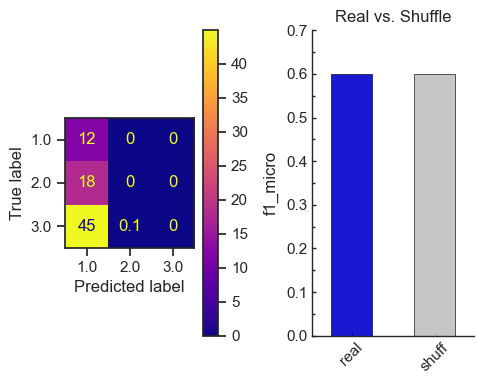

In [7]:
apical_model.plot_model_performance()

In [ ]:
apical_model.full_model_test_score

In [ ]:
apical_model.full_model_train_score